## US Accidents Exploratory Data Analysis

### Download the dataset from Kaggle

In [178]:
import pandas as pd
import opendatasets as od
import datetime as dt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [6]:
od.download("https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading us-accidents.zip to .\us-accidents


100%|██████████| 269M/269M [06:06<00:00, 771kB/s]  


### Read Data using Pandas Dataframe

In [8]:
datafile_name='./us-accidents/US_Accidents_Dec21_updated.csv'

In [9]:
accident_df= pd.read_csv(datafile_name)

In [10]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [145]:
accident_df.shape

(2845342, 47)

### Calculate No of Missing Values

In [33]:
missing_perct=accident_df.isnull().sum().sort_values(ascending=False) / len(accident_df)

missing_perct[(round(missing_perct,2) * 100) !=0]

Number               0.612900
Precipitation(in)    0.193108
Wind_Chill(F)        0.165057
Wind_Speed(mph)      0.055510
Wind_Direction       0.025928
Humidity(%)          0.025688
Weather_Condition    0.024825
Visibility(mi)       0.024794
Temperature(F)       0.024346
Pressure(in)         0.020806
Weather_Timestamp    0.017831
dtype: float64

<AxesSubplot:>

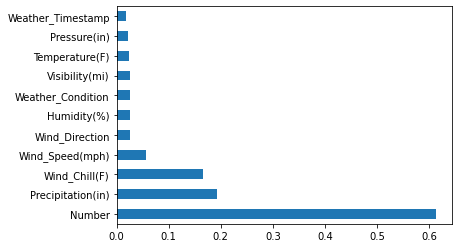

In [34]:
missing_perct[(round(missing_perct,2) * 100) !=0].plot(kind='barh')

In [13]:
# Explore Data Types
accident_df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [17]:
# Change Dates Datatype from Object to Time
accident_df['Start_Time']=pd.to_datetime(accident_df['Start_Time'])
accident_df['End_Time']=pd.to_datetime(accident_df['End_Time'])

In [19]:
# Done Despcriptive Data Analysis
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [25]:
# Find No of Numerical Columns in Dataset
df_numerics_only = accident_df.select_dtypes(include=np.number)
len(df_numerics_only.columns)

<IPython.core.display.Javascript object>

14

## Exploratory Data Analysis and Visualization
*Following Columns has been selected for EDA and to explore the answers of Questions*

- City, State
- Start_Time
- Start Lat, Start Lng
- Temperature
- Weather Condition
  

In [35]:
# Explore the Columns name used in the Dataset
accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**City and States Columns working**

In [39]:
# Take count of all cities
cities=accident_df.City.unique()
len(cities)

11682

- Count Accidents by Cities in states

In [82]:
accident_by_Cities=accident_df['State'].groupby(accident_df['City']).value_counts().sort_values(ascending=False)
accident_by_Cities[:10]

City         State
Miami        FL       106896
Los Angeles  CA        68956
Orlando      FL        54654
Dallas       TX        41615
Houston      TX        39366
Charlotte    NC        32998
Sacramento   CA        32559
San Diego    CA        26627
Raleigh      NC        22837
Minneapolis  MN        22768
Name: State, dtype: int64

<AxesSubplot:ylabel='City,State'>

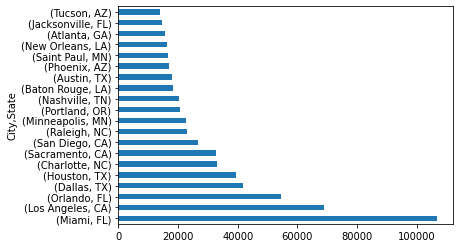

In [83]:
accident_by_Cities[:20].plot(kind='barh')

<AxesSubplot:xlabel='State', ylabel='Count'>

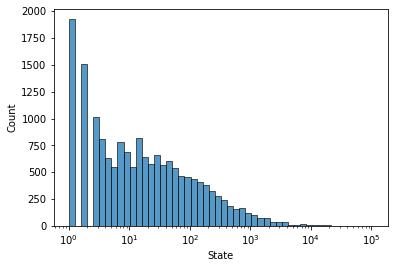

In [81]:
sns.histplot(accident_by_cities, log_scale=True)

Observations: Less than 2000 States IN US have maximum number of accidents, While more than 16000 States have minimum No of Accidents

In [68]:
high_accident_states= accident_by_Cities[accident_by_Cities >=1500] 
low_accident_states= accident_by_Cities[accident_by_Cities < 1500]

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State', ylabel='Density'>

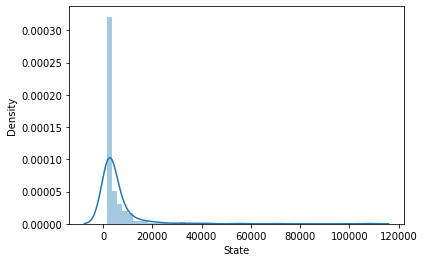

In [75]:
sns.distplot(high_accident_states)

In [73]:
len(high_accident_cities)/ len(accident_by_Cities)

0.14471352628470172

In [74]:
len(low_accident_states)/ len(accident_by_Cities)

0.9828115770821028

### Q.  Which state has the highest accident ratio

In [101]:
accident_by_states=accident_by_Cities.groupby(['State']).sum().sort_values(ascending=False)
accident_by_states[:10]

State
CA    795861
FL    401382
TX    149037
OR    126338
VA    113535
NY    108024
PA     99975
MN     97182
NC     91362
SC     89216
Name: State, dtype: int64

**Start Date Working**

### Q.  which time the most accidents occur?

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

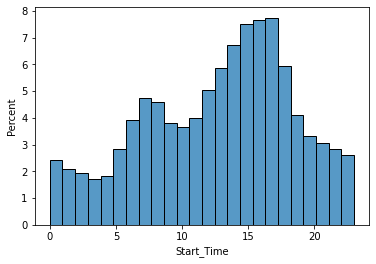

In [125]:
sns.histplot(accident_df.Start_Time.dt.hour, bins=24, stat='percent')

Observations: From 5AM to 10AM, No of accidents ratio is high and then from 2Pm to 6PM , accident ratio is higher. It may be due to Peak timing of traffic due to early morning and in evening for office and school goings persons.

### Q. Which days of week have more accidents?

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

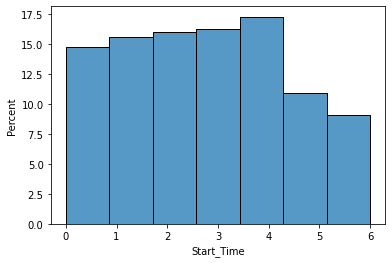

In [128]:
sns.histplot(accident_df.Start_Time.dt.dayofweek, bins=7, stat='percent')

Observations: During Weekdays No of accidents are more often than weekends 
becuase of people stay at home and less traffic flow on weekends.

In [135]:
saturdays_accident_df= accident_df.Start_Time[accident_df.Start_Time.dt.dayofweek==5]
sunday_accident_df=accident_df.Start_Time[accident_df.Start_Time.dt.dayofweek==6]

- Mostly occured accidents timings on weekend

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

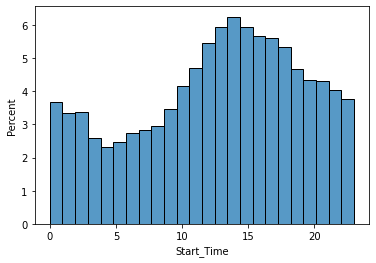

In [134]:
sns.histplot(saturdays_accident_df.dt.hour, bins=24, stat='percent')

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

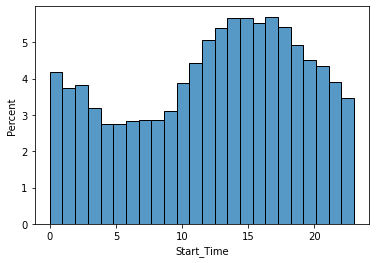

In [142]:
sns.histplot(sunday_accident_df.dt.hour, bins=24, stat='percent')

Observations: On Weekends mostly accident occur during between 12PM to 8PM

### Q. Weather accidents are in colder or warmer areas?

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

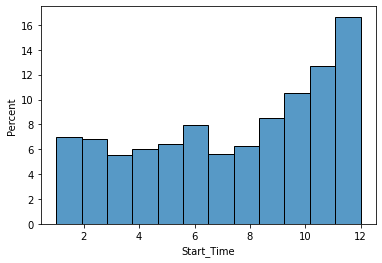

In [146]:
sns.histplot(accident_df.Start_Time.dt.month, bins=12, stat='percent')

Observations:In summer, No of accidents occur less than mostly in winter from September to Dec. From September, accident ratio going start toward higher till December. While from January to August, Accident ratio has no significant difference in distribution

### Q. Which months have the most accidents?
### Q. What is the trend of accident year by year?

<AxesSubplot:xlabel='Start_Time', ylabel='Percent'>

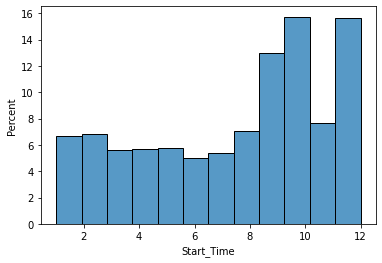

In [166]:
data_2021=accident_df[accident_df.Start_Time.dt.year.isin([2016,2017,2018,2019,2020,2021])]
sns.histplot(data_2019.Start_Time.dt.month, bins=12, stat='percent')

Observation:  Intestingly it is find that from Sep to Dec although there was rise in accidents but in the month of November in all years No of accidents 
less then Sep, Oct and Dec.
  
Year by year trend is same as different year accidents distribution is identical approx.

**Start Latitude & Start Longitude**

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

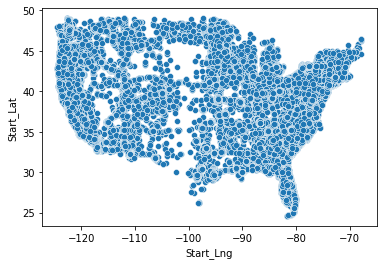

In [172]:
df_sample=accident_df.sample(int(0.1*len(accident_df)))
sns.scatterplot(x=df_sample.Start_Lng, y=df_sample.Start_Lat)

In [175]:
df_sample=accident_df.sample(int(0.01*len(accident_df)))

In [185]:
lat_log_pair= list(zip(list(df_sample.Start_Lat),list(df_sample.Start_Lng)))

In [187]:
map=folium.Map()
HeatMap(lat_log_pair).add_to(map)
map

### Ask Question & Answers
- Weather accidents are in colder or warmer areas
- In which time the most accidents occur
- Which state has the highest accident ratio
- What time of the days have most accidents
- Which days of week have more accidents
- Which months have the most accidents
-  What is the trend of accident year by year

# Summary & Conclusions

- Less than 14% Cities have more than 1500 accidents yearly.
- No Data of Newyork, which has highest population rate in US.
- Near about 1900 cities have reported just One accident (Investigating)